In [19]:
!pip install scikit-learn

In [20]:
import numpy as np
import pandas as pd
import sklearn
import random
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler#, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, make_scorer

In [22]:
genres = [
    'Action',
    'Comedy',
    'Drama',
    'Romance',
    'Thriller',
    'Horror',
    'Sci-Fi',
    'Fantasy',
    'Crime',
    'Adventure'
]

df_users = pd.read_csv('users_extended_modified.csv')
df_films = pd.read_csv('films.csv')
df_films.drop(columns=['movie_image_url'], inplace=True)
X = df_users.drop(columns=['user_id', 'favorite_movie_id']).values
y = df_users['favorite_movie_id'].values

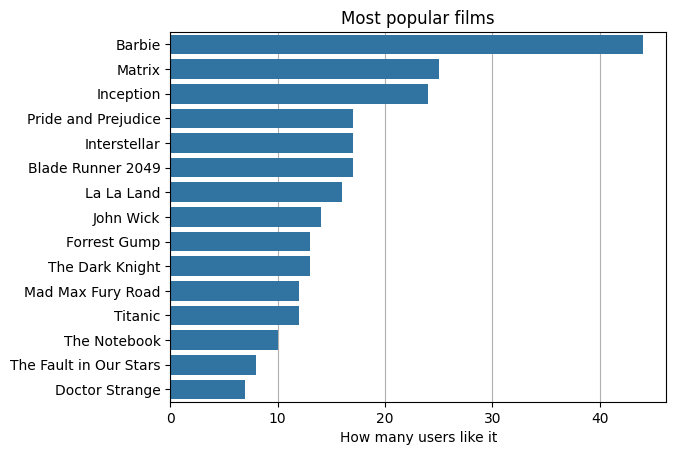

In [23]:
# Firstly we need to show which film appear the most,
# their probability to be recommended is higher

df_count_films = df_users.groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(
        by='user_id', ascending=False
        )
df_count_films.rename(columns={'user_id':'count',
                               'favorite_movie_id':'movie_id'}, inplace=True)
df_count_films = df_count_films.merge(df_films, on='movie_id').head(15)
ax1 = sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films,
    zorder=2
)
plt.xlabel('How many users like it')
plt.ylabel('')
plt.title('Most popular films')
ax1.grid(axis='x', zorder=1)
plt.savefig('most_popular_films.png', bbox_inches='tight')
plt.show()

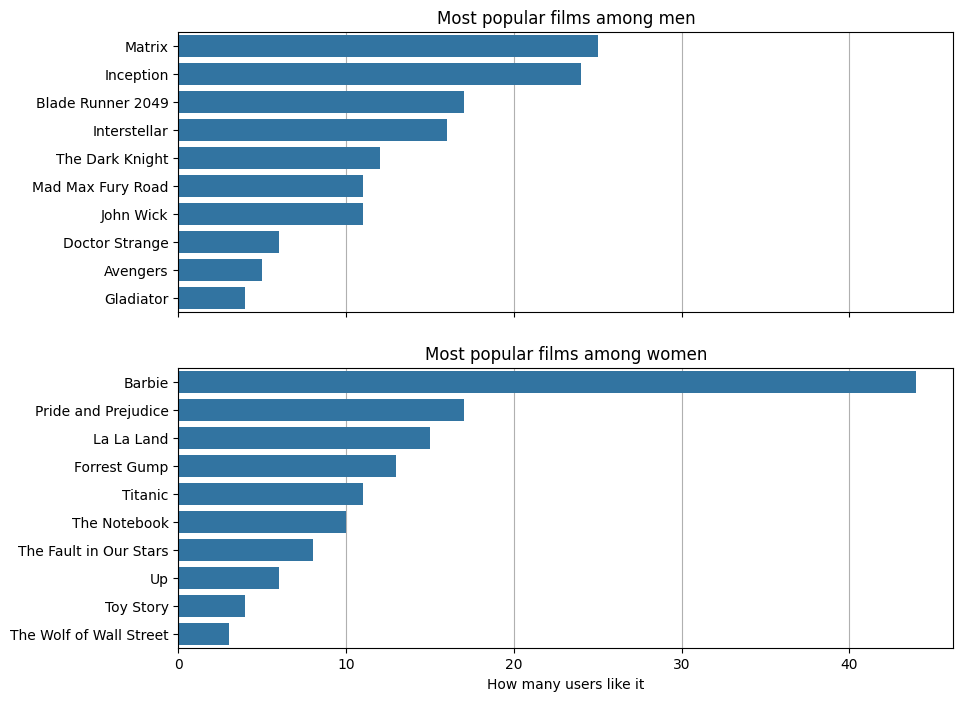

In [24]:
# Now we will break down our data into male and female parts.
# We will analyse how preferences differ between genders

# Men
df_men_users = df_users[df_users['gender'] == 1]
df_count_films_for_men = df_men_users.groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(by='user_id',
                                                   ascending=False)
df_count_films_for_men.rename(columns={'user_id':'count',
                                       'favorite_movie_id':'movie_id'},
                                       inplace=True)
df_count_films_for_men = df_count_films_for_men.merge(
    df_films, on='movie_id').head(10)

# Women
df_women_users = df_users[df_users['gender'] == 0]
df_count_films_for_women = df_women_users.groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(by='user_id',
                                                   ascending=False)
df_count_films_for_women.rename(columns={'user_id':'count',
                                         'favorite_movie_id':'movie_id'},
                                         inplace=True)
df_count_films_for_women = df_count_films_for_women.merge(
    df_films, on='movie_id').head(10)

# Vizualising
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films_for_men,
    ax=ax2,
    zorder=2
)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most popular films among men')
ax2.grid(axis='x', zorder=1)

sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films_for_women,
    ax=ax3,
    zorder=2
)
ax3.set_xlabel('How many users like it')
ax3.set_ylabel('')
ax3.set_title('Most popular films among women')
ax3.grid(axis='x', zorder=1)

plt.savefig('most_popular_films_divided_by_gender.png', bbox_inches='tight')
plt.show()

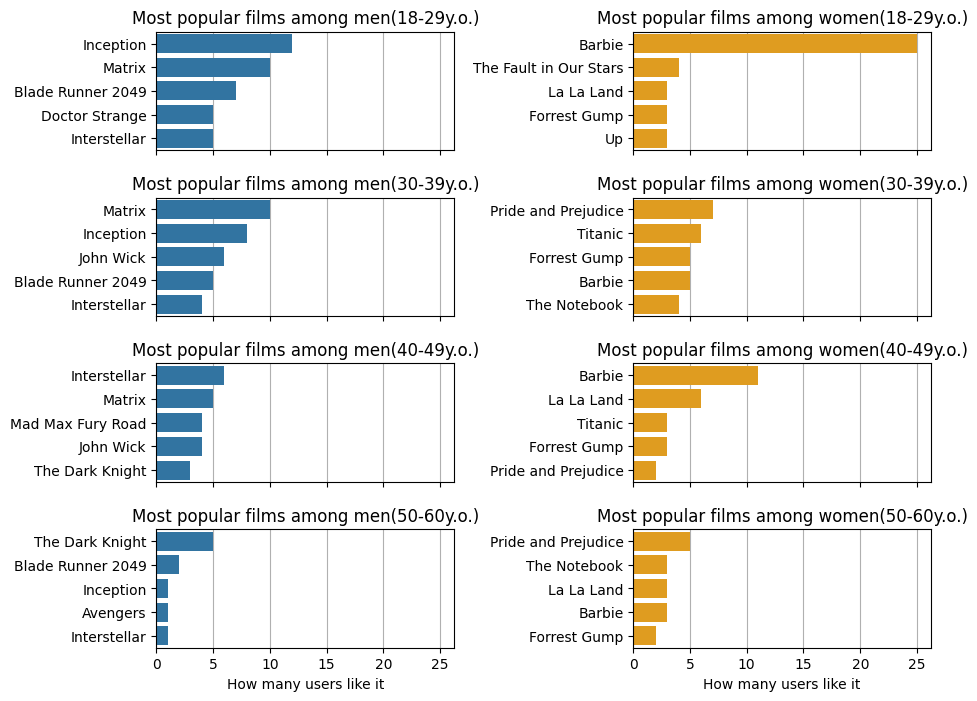

In [25]:
# Now we will go further and break down our data into age groups.
# We will analyse how preferences differ between age groups

# Preparing data
df_users['age_group'] = pd.cut(
    df_users['age'],
    bins = [17, 29, 39, 49, 60],
    labels=['18-29', '30-39', '40-49', '50-60']
)

df_men_users = df_users[df_users['gender'] == 1]
df_women_users = df_users[df_users['gender'] == 0]
list_of_df_count_films_for_men_devided_by_age = []
list_of_df_count_films_for_women_devided_by_age = []
list_of_ages = [
    '18-29',
    '30-39',
    '40-49',
    '50-60'
]

for i in range(0, 4):
  list_of_df_count_films_for_men_devided_by_age.append(
      df_men_users[df_men_users['age_group'] == list_of_ages[i]].groupby(
          by='favorite_movie_id'
          )['user_id'].count().reset_index().sort_values(by='user_id',
                                                         ascending=False))
  list_of_df_count_films_for_men_devided_by_age[i].rename(
      columns={'user_id':'count', 'favorite_movie_id':'movie_id'},
      inplace=True)
  list_of_df_count_films_for_men_devided_by_age[
      i] = list_of_df_count_films_for_men_devided_by_age[
          i].merge(df_films, on='movie_id').head(5)

  list_of_df_count_films_for_women_devided_by_age.append(
      df_women_users[df_women_users['age_group'] == list_of_ages[i]].groupby(
          by='favorite_movie_id'
          )['user_id'].count().reset_index().sort_values(by='user_id',
                                                         ascending=False))
  list_of_df_count_films_for_women_devided_by_age[i].rename(
      columns={'user_id':'count', 'favorite_movie_id':'movie_id'},
      inplace=True)
  list_of_df_count_films_for_women_devided_by_age[
      i] = list_of_df_count_films_for_women_devided_by_age[
          i].merge(df_films, on='movie_id').head(5)

# Vizualising
fig, axes = plt.subplots(4, 2, figsize=(10, 8), sharex=True)
for i in range(0, 4):
  sns.barplot(
      y='film_name',
      x='count',
      data=list_of_df_count_films_for_men_devided_by_age[i],
      ax=axes[i, 0],
      zorder=2
  )
  axes[i, 0].set_xlabel('How many users like it')
  axes[i, 0].set_ylabel('')
  title = 'Most popular films among men(' + list_of_ages[i] + 'y.o.)'
  axes[i, 0].set_title(title)
  axes[i, 0].grid(axis='x', zorder=1)
  sns.barplot(
      y='film_name',
      x='count',
      data=list_of_df_count_films_for_women_devided_by_age[i],
      ax=axes[i, 1],
      zorder=2,
      color='orange'
  )
  axes[i, 1].set_xlabel('How many users like it')
  axes[i, 1].set_ylabel('')
  title = 'Most popular films among women(' + list_of_ages[i] + 'y.o.)'
  axes[i, 1].set_title(title)
  axes[i, 1].grid(axis='x', zorder=1)

plt.subplots_adjust(
    hspace=0.4,
    wspace=0.6
)
plt.savefig('most_popular_films_divided_by_gender_and_age.png',
            bbox_inches='tight')
plt.show()

In [26]:
def topK_hit_rate(estimator, X_test, y_test):
  knn = estimator.named_steps['model']
  k = knn.n_neighbors
  X_test_scaled = estimator.named_steps['scale'].transform(X_test)
  distances, indices = knn.kneighbors(X_test_scaled, n_neighbors=k)
  hits = 0
  for i in range(len(X_test_scaled)):
    neighbors_movies = y_train.iloc[indices[i]]
    if y_test.iloc[i] in neighbors_movies.values:
      hits+=1
  return hits/len(X_test_scaled)

def topK_genre_hit_rate(estimator, X_test, y_test, lower_limit=0.8, upper_limit=1.2):
  knn = estimator.named_steps['model']
  k = knn.n_neighbors
  X_test_scaled = estimator.named_steps['scale'].transform(X_test)
  distances, indices = knn.kneighbors(X_test_scaled, n_neighbors=k)
  hits = 0
  for i in range(len(X_test_scaled)):
    neighbors_movies = y_train.iloc[indices[i]]

    film_genres = []
    for j in range(len(neighbors_movies.values)):
      film_genres.append(
          df_films[
              df_films['movie_id'] == neighbors_movies.values[j]].iloc[0, 2:])

    filmTrue_genres = df_films[
      df_films['movie_id'] == y_test.iloc[i]].iloc[0, 2:]

    coincidences = [0] * k

    count_genres = []
    for j in range(len(film_genres)):
      count_genres.append((film_genres[j] == 1).sum())
    countTrue_genres = (filmTrue_genres == 1).sum()
    if countTrue_genres == 0:
      continue

    for j in range(len(filmTrue_genres)):
      for m in range(len(film_genres)):
        if (film_genres[m].iloc[j] == filmTrue_genres.iloc[j] and
          filmTrue_genres.iloc[j] == 1):
          coincidences[m]+=1

    for j in range(len(coincidences)):
      if countTrue_genres in (3, 4):
        if (countTrue_genres - coincidences[j] <= 1 and
          count_genres[j]-countTrue_genres <= 1):
          hits+=1
          break
      elif countTrue_genres == 2:
        if ((countTrue_genres - coincidences[j] <= 1 and
            count_genres[j] == countTrue_genres) or
              (countTrue_genres == coincidences[j] and
              count_genres[j] - countTrue_genres <= 1)):
          hits+=1
          break
      elif countTrue_genres >= 5:
        if (coincidences[j]/countTrue_genres >= lower_limit and
            count_genres[j]/countTrue_genres <= upper_limit):
          hits+=1
          break
      else:
        if (countTrue_genres == coincidences[j] and
          count_genres[j]-countTrue_genres <= 1):
          hits+=1
          break



  return hits/len(X_test)

def genre_hit_rate(estimator, X_test, y_test, lower_limit=0.8, upper_limit=1.2):
  knn = estimator.named_steps['model']
  y_pred = estimator.predict(X_test)
  hits = 0

  for i in range(len(X_test)):
    pred_movie = y_pred[i]
    true_movie = y_test.iloc[i]

    pred_genres = df_films[df_films['movie_id'] == pred_movie].iloc[0, 2:]
    true_genres = df_films[df_films['movie_id'] == true_movie].iloc[0, 2:]

    countPred_genres = (pred_genres == 1).sum()
    countTrue_genres = (true_genres == 1).sum()

    if countTrue_genres == 0: continue

    coincidence = ((pred_genres == 1) & (true_genres == 1)).sum()
    '''print('------')
    print('True movie', true_movie)
    print('genre count', countTrue_genres)
    print('---')
    print('Pred movie', pred_movie)
    print('genre count', countPred_genres)
    print('---')
    print('matching genres count', coincidence)
    print('------')'''
    if countTrue_genres >= 5:
      if (coincidence/countTrue_genres >= lower_limit and
          countPred_genres/countTrue_genres <= upper_limit):
        hits+=1
    elif countTrue_genres in (3, 4):
      if (countTrue_genres - coincidence <= 1 and
          countPred_genres-countTrue_genres <= 1):
        hits+=1
    elif countTrue_genres == 2:
      if ((countTrue_genres - coincidence <= 1 and
           countPred_genres == countTrue_genres) or
            (countTrue_genres == coincidence and
             countPred_genres - countTrue_genres <= 1)):
        hits+=1
    else:
      if (countTrue_genres == coincidence and
          countPred_genres-countTrue_genres <= 1):
        hits+=1

  return hits/len(X_test)

def genre_coincidence_scaler(y_true, y_pred):
  hits = 0
  y_true = y_true.tolist()
  for i in range(len(y_true)):
    movieTrue = y_true[i]
    moviePred = y_pred[i]

    true_genres = df_films[df_films['movie_id'] == movieTrue].iloc[0, 2:]
    pred_genres = df_films[df_films['movie_id'] == moviePred].iloc[0, 2:]

    countTrue_genres = (true_genres == 1).sum()
    if countTrue_genres == 0: continue
    countPred_genres = (pred_genres == 1).sum()

    coincidence = ((true_genres == 1) & (pred_genres == 1)).sum()

    if countTrue_genres >= 5:
      if (coincidence/countTrue_genres >= 0.8 and
          countPred_genres/countTrue_genres <= 1.2):
        hits+=1
    elif countTrue_genres in (3, 4):
      if (countTrue_genres - coincidence <= 1 and
          countPred_genres-countTrue_genres <= 1):
        hits+=1
    elif countTrue_genres == 2:
      if ((countTrue_genres - coincidence <= 1 and
           countPred_genres == countTrue_genres) or
            (countTrue_genres == coincidence and
             countPred_genres - countTrue_genres <= 1)):
        hits+=1
    else:
      if (countTrue_genres == coincidence and
          countPred_genres-countTrue_genres <= 1):
        hits+=1
  return hits/len(y_true)


In [27]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=1))
])

mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors':[3,4,5,6,7,8,9,10],
                               'model__weights': ['uniform', 'distance']},
                   cv=3,
                   scoring=make_scorer(genre_coincidence_scaler),
                   n_jobs=-1)

y = pd.Series(y)
counts = y.value_counts()
valid_movies = counts[counts >= 10].index
mask = y.isin(valid_movies)
X_filtered = X[mask]
y_filtered = y[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {int(round(accuracy, 2) * 100)}%')
print(f'Top-K Hit Rate: {int(round(topK_hit_rate(mod.best_estimator_, X_test, y_test), 2)*100)}%')
print(f'Top-K Genre Hit Rate: {int(round(topK_genre_hit_rate(mod.best_estimator_, X_test, y_test), 2)*100)}%')
print(f'Genre Hit Rate: {int(round(genre_hit_rate(mod.best_estimator_, X_test, y_test), 2)*100)}%')
#print(classification_report(y_test, y_pred))
pd.DataFrame(mod.cv_results_)

print(f"\nBest params: {mod.best_params_}")
print(f"Best model n_neighbors: {mod.best_estimator_.named_steps['model'].n_neighbors}")
#pd.DataFrame(mod.cv_results_)

Accuracy: 26%
Top-K Hit Rate: 68%
Top-K Genre Hit Rate: 98%
Genre Hit Rate: 72%

Best params: {'model__n_neighbors': 8, 'model__weights': 'uniform'}
Best model n_neighbors: 8


In [28]:
mod.fit(X, y)
print(f"\nBest params: {mod.best_params_}")
print(f"Best model n_neighbors: {mod.best_estimator_.named_steps['model'].n_neighbors}")
joblib.dump(mod.best_estimator_, "movie_model.pkl")
def make_recommendation(user_info, mod, df_films):
  film_id = mod.predict(user_info)
  return (int(film_id[0]),
          df_films[df_films['movie_id'] == film_id[0]].iloc[0, 1])

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



Best params: {'model__n_neighbors': 8, 'model__weights': 'uniform'}
Best model n_neighbors: 8


In [29]:
#Age,Gender,Action,Drama,Comedy,Romance,SciFi,Horror,Thriller,Fantasy,Animation,Crime
rec_1 = make_recommendation(np.array([[30,0,4,10,4,10,4,4,4,10,4,4]]),
                            mod, df_films)
rec_2 = make_recommendation(np.array([[20,1,10,4,4,4,10,4,4,10,4,4]]),
                            mod, df_films)
print(f'Recomendation for first user(30 y.o. woman): {rec_1}')
print(f'Recomendation for second user(20 y.o. man): {rec_2}')
#6,The Notebook,0,1,0,1,0,0,0,0,0,0
#14,Matrix,1,0,0,0,1,0,1,1,0,0

Recomendation for first user(30 y.o. woman): (6, 'The Notebook')
Recomendation for second user(20 y.o. man): (14, 'Matrix')


In [30]:
rec_1 = make_recommendation(np.array([[25,0,10,4,4,4,4,4,4,10,4,4]]),
                            mod, df_films)
rec_2 = make_recommendation(np.array([[25,1,10,4,4,4,4,4,4,10,4,4]]),
                            mod, df_films)
print(f'Recomendation for female-user: {rec_1}')
print(f'Recomendation for male-user: {rec_2}')
#11,Barbie,0,1,1,1,0,0,0,1,1,0
#30,Blade Runner 2049,1,1,0,0,1,0,1,0,0,0

Recomendation for female-user: (32, 'Mad Max Fury Road')
Recomendation for male-user: (30, 'Blade Runner 2049')


In [31]:
rec_1 = make_recommendation(np.array([[20,0,4,10,10,10,4,4,4,4,4,10]]),
                            mod, df_films)
rec_2 = make_recommendation(np.array([[55,0,4,10,10,10,4,4,4,4,4,10]]),
                            mod, df_films)
print(f'Recomendation for 20 y.o. woman: {rec_1}')
print(f'Recomendation for 55 y.o. woman: {rec_2}')
#11,Barbie,0,1,1,1,0,0,0,1,1,0
#8,Pride and Prejudice,0,1,0,1,0,0,0,0,0,0

Recomendation for 20 y.o. woman: (11, 'Barbie')
Recomendation for 55 y.o. woman: (8, 'Pride and Prejudice')


In [32]:
make_recommendation(np.array([[18, 1, 8, 7, 4, 2, 2, 2, 3, 8, 5, 9]]),
                    mod, df_films)
#  14,Matrix,1,0,0,0,1,0,1,1,0,0
#            8,7,4,2,2,2,3,8,5,9
#1,Inception,1,0,0,0,1,0,1,1,0,1

(1, 'Inception')

In [33]:
make_recommendation(np.array([[19,1,10,10,4,4,10,4,10,10,10,10]]),
                    mod, df_films)

(1, 'Inception')

In [34]:
make_recommendation(np.array([[19,1,8,8,2,7,10,3,8,7,8,6]]),
                    mod, df_films)

(7, 'Interstellar')

In [35]:
make_recommendation(np.array([[50,1,10,4,4,4,4,4,4,10,10,4]]),
                    mod, df_films)

(14, 'Matrix')